In [479]:
import pathlib
import seaborn as sns
import utils
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [480]:
url = 'https://glusfqycvwrucp9-db202202211424.adb.eu-zurich-1.oraclecloudapps.com/ords/sensor_datalake1/sens/insert/'

df = utils.get_all_pages(url)

In [481]:
df.head()

,entry_id,insert_time,sensor_id,value1,unit1
0,2291,2022-03-30T14:49:51.283Z,CIRCUITPY323d,785.0,PPM
1,2304,2022-03-30T14:56:37.668Z,CIRCUITPY323d,27.4,C
2,2307,2022-03-30T14:57:37.983Z,CIRCUITPY323d,27.4,C
3,2311,2022-03-30T14:58:40.293Z,CIRCUITPY323d,31.1,%
4,2328,2022-03-30T15:04:41.298Z,CIRCUITPY323d,27.7,C


In [482]:
#convert inser_time to timedate
df['insert_time'] = pd.to_datetime(df['insert_time'])
#and add 2 hours to insert time
df['insert_time'] = df['insert_time'] + pd.Timedelta(hours=2)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130952 entries, 0 to 130951
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   entry_id     130952 non-null  int64              
 1   insert_time  130952 non-null  datetime64[ns, UTC]
 2   sensor_id    130952 non-null  object             
 3   value1       130952 non-null  float64            
 4   unit1        130952 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 5.0+ MB


In [483]:
#pivot
df_pivot = df.pivot_table(index='insert_time',columns=['sensor_id','unit1'],values='value1')
#multindex to single index
df_pivot.columns =	df_pivot.columns.map('_'.join)
#resample on 5min time windows
df_pivot = df_pivot.resample('1Min').agg({'CIRCUITPY323d_PPM':'mean', 'CIRCUITPY323d_C':'mean','CIRCUITPY323d_%':'mean','CIRCUITPY825a_Window':'last','CIRCUITPYbec9_Person':'last'})
df_pivot.head(30)

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
insert_time,,,,,
2022-03-24 16:02:00+00:00,1068.800000,26.600000,34.600000,0.0,NaN
2022-03-24 16:03:00+00:00,1073.700000,26.500000,32.500000,NaN,NaN
2022-03-24 16:04:00+00:00,1061.600000,26.400000,33.450000,NaN,NaN
2022-03-24 16:05:00+00:00,1072.400000,26.400000,33.950000,NaN,NaN
2022-03-24 16:06:00+00:00,1115.650000,26.400000,34.150000,NaN,NaN
2022-03-24 16:07:00+00:00,1145.600000,26.400000,34.700000,NaN,NaN
2022-03-24 16:08:00+00:00,1142.450000,26.400000,35.000000,NaN,NaN
2022-03-24 16:09:00+00:00,1152.500000,26.400000,35.550000,NaN,NaN
2022-03-24 16:10:00+00:00,1200.900000,26.400000,35.850000,NaN,NaN


In [484]:
#neue Variable die die Luftqualität Quantitativ einordnet
df_pivot['air_quality'] =np.where(np.floor(df_pivot['CIRCUITPY323d_PPM']).isin(range(600,1000)), 'good',
                   np.where(np.floor(df_pivot['CIRCUITPY323d_PPM']).isin(range(1000,1400)), 'ok',
                   np.where(np.floor(df_pivot['CIRCUITPY323d_PPM'])>1400, 'bad', 'top')))

In [485]:
#select specific time window
df_timewindow = df_pivot.loc['2022-04-15 12:00:00':'2022-05-04 23:50:00']

In [486]:
#Fill Nan for window sensor
df_timewindow['CIRCUITPY825a_Window'].fillna(method='ffill',inplace=True)
df_timewindow['CIRCUITPY825a_Window'].fillna(method='bfill',inplace=True)
#Fill Nan for people sensor
df_timewindow['CIRCUITPYbec9_Person'].fillna(method='ffill',inplace=True)
#Fill Nan for first entry for people sensor
df_timewindow['CIRCUITPYbec9_Person'].fillna(method='bfill',inplace=True)



df_timewindow

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person,air_quality
insert_time,,,,,,
2022-04-15 12:00:00+00:00,673.1,26.2,44.4,0.0,1.0,good
2022-04-15 12:01:00+00:00,667.7,26.3,44.4,0.0,1.0,good
2022-04-15 12:02:00+00:00,663.0,26.3,44.3,0.0,1.0,good
2022-04-15 12:03:00+00:00,659.3,26.3,44.4,0.0,1.0,good
2022-04-15 12:04:00+00:00,661.8,26.3,44.5,0.0,1.0,good
...,...,...,...,...,...,...
2022-05-04 23:46:00+00:00,693.6,26.0,45.8,0.0,0.0,good
2022-05-04 23:47:00+00:00,692.7,26.0,45.8,0.0,0.0,good
2022-05-04 23:48:00+00:00,689.6,26.0,45.7,0.0,0.0,good


In [487]:
df_timewindow["CIRCUITPY323d_PPM"].isna().sum()

5280

In [488]:
df_timewindow["CIRCUITPY323d_C"].isna().sum()

5285

In [489]:
df_timewindow["CIRCUITPY323d_%"].isna().sum()

5274

In [490]:
index = df_timewindow.index
index.tz_convert(tz=None)

DatetimeIndex(['2022-04-15 12:00:00', '2022-04-15 12:01:00',
               '2022-04-15 12:02:00', '2022-04-15 12:03:00',
               '2022-04-15 12:04:00', '2022-04-15 12:05:00',
               '2022-04-15 12:06:00', '2022-04-15 12:07:00',
               '2022-04-15 12:08:00', '2022-04-15 12:09:00',
               ...
               '2022-05-04 23:41:00', '2022-05-04 23:42:00',
               '2022-05-04 23:43:00', '2022-05-04 23:44:00',
               '2022-05-04 23:45:00', '2022-05-04 23:46:00',
               '2022-05-04 23:47:00', '2022-05-04 23:48:00',
               '2022-05-04 23:49:00', '2022-05-04 23:50:00'],
              dtype='datetime64[ns]', name='insert_time', length=28071, freq='T')

In [491]:
df_timewindow = df_timewindow.resample('1Min').agg({'CIRCUITPY323d_PPM':'mean', 'CIRCUITPY323d_C':'mean','CIRCUITPY323d_%':'mean','CIRCUITPY825a_Window':'last','CIRCUITPYbec9_Person':'last','air_quality':'last'})
 #'slope': np.polyfit(x=df_timewindow.index.tz_convert(None), y=df_timewindow['CIRCUITPY323d_PPM'], deg=1)[0]}

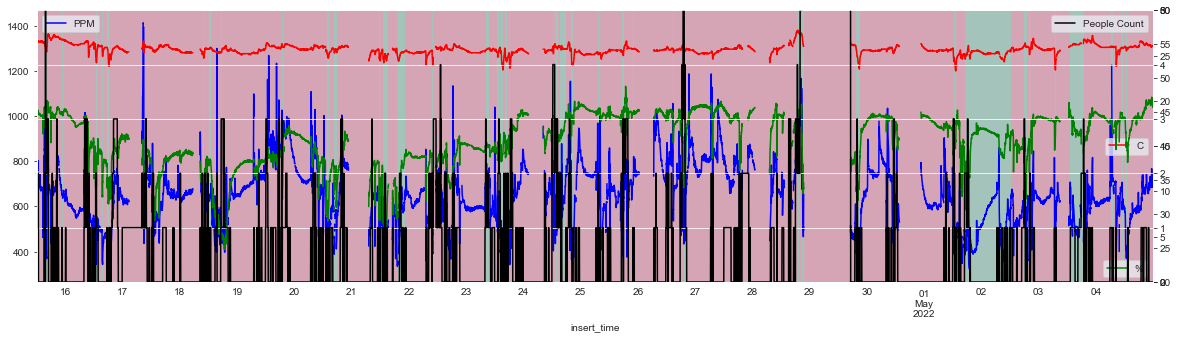

In [492]:
#linechart cobined with bar chart
#if windows sensor 1 blue line if windows sensor 0 red line
# Use a boundary norm instead
fig, ax1 = plt.subplots()
#hide grid
ax1 = df_timewindow['CIRCUITPY323d_PPM'].plot(kind='line',color='blue',label='PPM', grid=False)
ax3 = ax1.twinx()
ax3 = df_timewindow['CIRCUITPY323d_C'].plot(kind='line',color='red',label='C', grid=False,ylim=(0,30))
ax4 = ax1.twinx()
ax4 = df_timewindow['CIRCUITPY323d_%'].plot(kind='line',color='green',label='%', grid=False,ylim=(20,60))
ax2 = ax1.twinx()
ax2 = df_timewindow['CIRCUITPYbec9_Person'].plot(kind='line',color='black',label='People Count',ylim=(0,5))
ax1.pcolorfast(ax1.get_xlim(), ax1.get_ylim(),df_timewindow['CIRCUITPY825a_Window'].values[np.newaxis],cmap='RdYlGn', alpha=0.3,label='Windows')
#set size
ax1.figure.set_size_inches(20, 5)
#show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')
ax4.legend(loc='lower right')
#additonal legend for window sensor


plt.show()

In [493]:
#calculate correleation between two columns
df_timewindow.corr(method="spearman")

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
CIRCUITPY323d_PPM,1.000000,0.249225,0.459236,-0.365715,0.063986
CIRCUITPY323d_C,0.249225,1.000000,0.174458,-0.200024,0.196349
CIRCUITPY323d_%,0.459236,0.174458,1.000000,-0.202230,-0.118184
CIRCUITPY825a_Window,-0.365715,-0.200024,-0.202230,1.000000,0.086111
CIRCUITPYbec9_Person,0.063986,0.196349,-0.118184,0.086111,1.000000


In [494]:
#calculate correleation between two columns
df_timewindow.corr(method="pearson")

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
CIRCUITPY323d_PPM,1.000000,0.353213,0.458411,-0.376430,0.082577
CIRCUITPY323d_C,0.353213,1.000000,0.253544,-0.228534,0.217990
CIRCUITPY323d_%,0.458411,0.253544,1.000000,-0.200166,-0.118615
CIRCUITPY825a_Window,-0.376430,-0.228534,-0.200166,1.000000,0.028571
CIRCUITPYbec9_Person,0.082577,0.217990,-0.118615,0.028571,1.000000


Janis Ideen data wrangling

In [495]:
df_timewindow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28071 entries, 2022-04-15 12:00:00+00:00 to 2022-05-04 23:50:00+00:00
Freq: T
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CIRCUITPY323d_PPM     22791 non-null  float64
 1   CIRCUITPY323d_C       22786 non-null  float64
 2   CIRCUITPY323d_%       22797 non-null  float64
 3   CIRCUITPY825a_Window  28071 non-null  float64
 4   CIRCUITPYbec9_Person  28071 non-null  float64
 5   air_quality           28071 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.5+ MB


/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


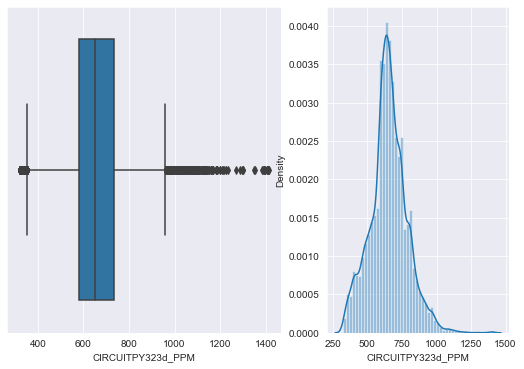

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


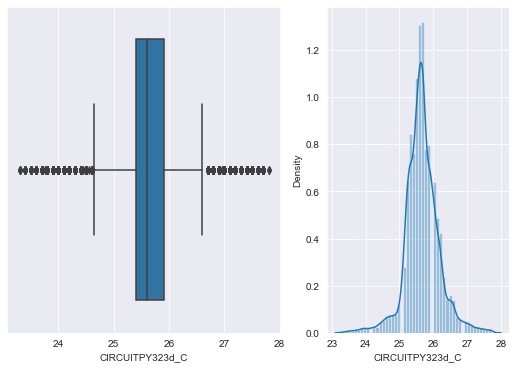

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


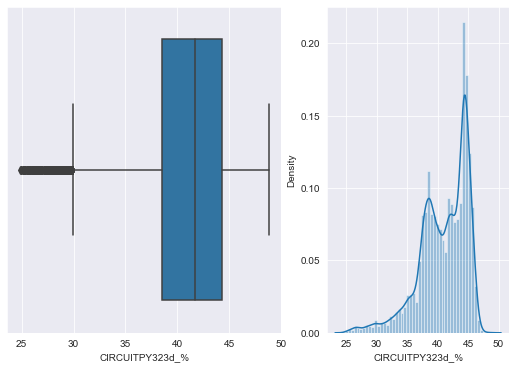

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


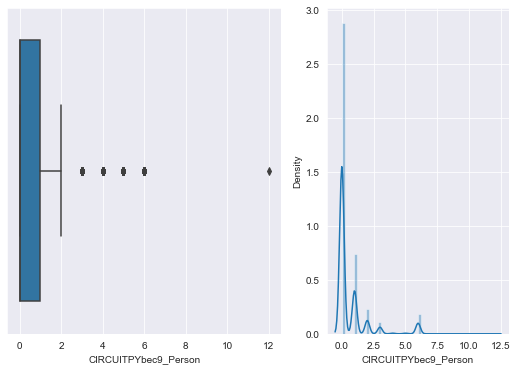

In [496]:
#detect outliers in PPM data
#print boxlot
utils.overview(df_timewindow, "CIRCUITPY323d_PPM")
utils.overview(df_timewindow, "CIRCUITPY323d_C")
utils.overview(df_timewindow, "CIRCUITPY323d_%")
utils.overview(df_timewindow, "CIRCUITPYbec9_Person")

In [497]:
print(df_timewindow['CIRCUITPY323d_PPM'].max())
print(df_timewindow['CIRCUITPY323d_PPM'].min())

1413.1999999999998
320.0


In [498]:
df_timewindow["air_quality"] == "ok"

insert_time
2022-04-15 12:00:00+00:00    False
2022-04-15 12:01:00+00:00    False
2022-04-15 12:02:00+00:00    False
2022-04-15 12:03:00+00:00    False
2022-04-15 12:04:00+00:00    False
                             ...  
2022-05-04 23:46:00+00:00    False
2022-05-04 23:47:00+00:00    False
2022-05-04 23:48:00+00:00    False
2022-05-04 23:49:00+00:00    False
2022-05-04 23:50:00+00:00    False
Freq: T, Name: air_quality, Length: 28071, dtype: bool

In [499]:
#only keep CO2 values above 1000
df_ppm_high = df_timewindow[df_timewindow["CIRCUITPY323d_PPM"] >= 1000]

In [500]:
df_ppm_high

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person,air_quality
insert_time,,,,,,
2022-04-15 15:16:00+00:00,1039.5,26.5,44.4,0.0,2.0,ok
2022-04-16 08:09:00+00:00,1000.7,26.4,44.1,0.0,2.0,ok
2022-04-16 08:10:00+00:00,1006.0,26.4,44.1,0.0,2.0,ok
2022-04-16 08:11:00+00:00,1004.7,26.4,44.1,0.0,2.0,ok
2022-04-16 08:12:00+00:00,1009.8,26.5,44.4,0.0,3.0,ok
...,...,...,...,...,...,...
2022-05-04 06:39:00+00:00,1149.7,26.0,43.6,1.0,1.0,ok
2022-05-04 06:40:00+00:00,1099.9,26.0,43.5,0.0,1.0,ok
2022-05-04 06:41:00+00:00,1054.8,25.9,43.1,0.0,1.0,ok


Wie ist der Zusammenhang zwischen Luftqualität und Frequenz bzw. Dauer des Lüftens?

In [501]:
#Wie stark sinkt der CO2 gehalt, wenn gelüftet wird?
#Wie schnell steigt der CO2 gehalt zwischen den einzelnen Lüftugsintervallen

In [502]:
#new dataframes window open and closed
df_window_open = df_timewindow[df_timewindow["CIRCUITPY825a_Window"]==1]
df_window_closed = df_timewindow[df_timewindow["CIRCUITPY825a_Window"]==0]
df_window_open

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person,air_quality
insert_time,,,,,,
2022-04-15 14:30:00+00:00,679.4,26.5,44.6,1.0,0.0,good
2022-04-15 14:31:00+00:00,682.8,26.5,44.3,1.0,0.0,good
2022-04-15 14:32:00+00:00,655.9,26.5,43.6,1.0,0.0,good
2022-04-15 14:33:00+00:00,573.8,26.5,43.0,1.0,0.0,top
2022-04-15 14:34:00+00:00,508.1,26.5,42.5,1.0,0.0,top
...,...,...,...,...,...,...
2022-05-04 13:15:00+00:00,390.0,25.8,39.2,1.0,0.0,top
2022-05-04 13:16:00+00:00,387.3,25.8,38.6,1.0,0.0,top
2022-05-04 13:17:00+00:00,382.1,25.8,37.7,1.0,0.0,top


In [503]:
#Mean time window open
index_closed = [0]
t_diff_closed = []
for i in range(len(df_timewindow)):
    if (df_timewindow.iloc[i]['CIRCUITPY825a_Window'] == 1.0) and (index_closed[-1] < i):
        index_closed.append(i)
        t_diff_closed.append(df_timewindow.index[index_closed[-1]] - df_timewindow.index[index_closed[-2]])
        next_zero_closed = index_closed[-1]
        while df_timewindow.iloc[next_zero_closed]['CIRCUITPY825a_Window'] != 0:
            next_zero_closed += 1
        index_closed.append(next_zero_closed)

In [504]:
index_open = []
t_diff_open = []
next_step = 0
while df_timewindow.iloc[next_step]['CIRCUITPY825a_Window'] != 1:
    next_step += 1
index_open.append(next_step)

for i in range(next_step, len(df_timewindow)):
    if (df_timewindow.iloc[i]['CIRCUITPY825a_Window'] == 0.0) and (index_open[-1] < i):
        index_open.append(i)
        t_diff_open.append(df_timewindow.index[index_open[-1]] - df_timewindow.index[index_open[-2]])
        next_zero_open = index_open[-1]
        while (next_zero_open < (len(df_timewindow)-2)):
            if df_timewindow.iloc[next_zero_open]['CIRCUITPY825a_Window'] == 1.0:
                break
            else:
                next_zero_open += 1
        index_open.append(next_zero_open)

In [545]:
#Mean time window open
print(np.mean(t_diff_open))

0 days 00:17:36.548223350


In [546]:
#Mean time window closed
print(np.mean(t_diff_closed))

0 days 02:04:14.693877551


In [612]:
df_mean_ppm_window = pd.DataFrame({"mean_ppm_window_open":[df_timewindow.iloc[index_open[0]:index_open[1]]['CIRCUITPY323d_PPM'].mean()],"mean_ppm_window_closed":[df_timewindow.iloc[index_closed[0]:index_closed[1]]['CIRCUITPY323d_PPM'].mean()]})

In [613]:
df_mean_ppm_window

,mean_ppm_window_open,mean_ppm_window_closed
0,569.78,701.667687


<Figure size 1440x360 with 0 Axes>

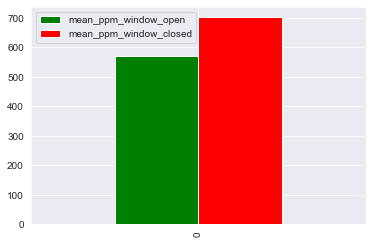

In [622]:
#barplot of mean ppm values
plt.figure(figsize=(20,5))
df_mean_ppm_window.plot(kind='bar',color=['green','red'],grid=True)
plt.show()

In [536]:
#Create new dataframe with time window open and change in ppm
df_timewindow_open = pd.DataFrame({"time_diff": t_diff_open, "ppm_diff":0, "ppm_per_min":0, "people_counter":0})

In [537]:
df_timewindow_open

,time_diff,ppm_diff,ppm_per_min,people_counter
0,0 days 00:10:00,0,0,0
1,0 days 00:01:00,0,0,0
2,0 days 00:01:00,0,0,0
3,0 days 00:01:00,0,0,0
4,0 days 00:29:00,0,0,0
...,...,...,...,...
192,0 days 00:25:00,0,0,0
193,0 days 00:03:00,0,0,0
194,0 days 00:01:00,0,0,0
195,0 days 00:01:00,0,0,0


In [538]:
count = 0
for i in range(0,(len(index_open)-1),2):
    df_timewindow_open["ppm_diff"][count] = df_timewindow["CIRCUITPY323d_PPM"][index_open[i+1]] - df_timewindow["CIRCUITPY323d_PPM"][index_open[i]]
    df_timewindow_open["people_counter"][count] = (df_timewindow["CIRCUITPYbec9_Person"][index_open[i+1]] + df_timewindow["CIRCUITPYbec9_Person"][index_open[i]])//2
    count += 1

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1140/183185156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_open["ppm_diff"][count] = df_timewindow["CIRCUITPY323d_PPM"][index_open[i+1]] - df_timewindow["CIRCUITPY323d_PPM"][index_open[i]]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1140/183185156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_open["people_counter"][count] = (df_timewindow["CIRCUITPYbec9_Person"][index_open[i+1]] + df_timewindow["CIRCUITPYbec9_Person"][index_open[i]])//2
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/

In [539]:
#fill ppm_per_min with ppm_diff/time_diff
for i in range(len(df_timewindow_open)):
    df_timewindow_open["ppm_per_min"][i] = df_timewindow_open["ppm_diff"][i]/(df_timewindow_open["time_diff"][i].seconds/60)

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1140/1051942319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_open["ppm_per_min"][i] = df_timewindow_open["ppm_diff"][i]/(df_timewindow_open["time_diff"][i].seconds/60)


In [540]:
df_timewindow_open.dropna(inplace=True)

In [541]:
df_timewindow_open = df_timewindow_open[df_timewindow_open["time_diff"] > pd.Timedelta(minutes=1)]

In [542]:
df_timewindow_open

,time_diff,ppm_diff,ppm_per_min,people_counter
0,0 days 00:10:00,-168.0,-16.000000,0
4,0 days 00:29:00,-411.9,-14.203448,1
6,0 days 00:03:00,-118.2,-39.400000,0
8,0 days 00:07:00,-268.1,-38.300000,0
9,0 days 00:06:00,-161.6,-26.933333,0
...,...,...,...,...
189,0 days 00:10:00,-324.6,-32.460000,0
190,0 days 00:05:00,-234.2,-46.840000,0
191,0 days 00:04:00,-117.1,-29.275000,0
192,0 days 00:25:00,-172.3,-6.892000,0


In [543]:
df_timewindow_open["ppm_per_min"].mean()

-25.167263436661916

In [544]:
df_timewindow_open["time_diff"].mean()

Timedelta('0 days 00:29:50.303030303')

<AxesSubplot:xlabel='people_counter', ylabel='ppm_diff'>

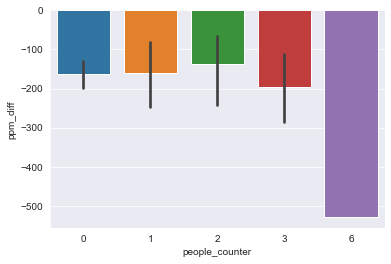

In [519]:
sns.barplot(x=df_timewindow_open["people_counter"], y=df_timewindow_open["ppm_diff"])

In [529]:
#Create new dataframe with time window closed and change in ppm
df_timewindow_closed = pd.DataFrame({"time_diff": t_diff_closed, "ppm_diff":0, "ppm_per_min":0, "people_counter":0})

In [530]:
count = 0
for i in range(0,(len(index_closed)-1),2):
    df_timewindow_closed["ppm_diff"][count] = df_timewindow["CIRCUITPY323d_PPM"][index_closed[i+1]] - df_timewindow["CIRCUITPY323d_PPM"][index_closed[i]]
    df_timewindow_closed["people_counter"][count] = (df_timewindow["CIRCUITPYbec9_Person"][index_closed[i+1]] + df_timewindow["CIRCUITPYbec9_Person"][index_closed[i]])//2
    count += 1

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1140/1550114921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_closed["ppm_diff"][count] = df_timewindow["CIRCUITPY323d_PPM"][index_closed[i+1]] - df_timewindow["CIRCUITPY323d_PPM"][index_closed[i]]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1140/1550114921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_closed["people_counter"][count] = (df_timewindow["CIRCUITPYbec9_Person"][index_closed[i+1]] + df_timewindow["CIRCUITPYbec9_Person"][index_closed[i]])//2
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-pa

In [531]:
#fill ppm_per_min with ppm_diff/time_diff
for i in range(len(df_timewindow_closed)):
    df_timewindow_closed["ppm_per_min"][i] = df_timewindow_closed["ppm_diff"][i]/(df_timewindow_closed["time_diff"][i].seconds/60)

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1140/1669602144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_closed["ppm_per_min"][i] = df_timewindow_closed["ppm_diff"][i]/(df_timewindow_closed["time_diff"][i].seconds/60)


In [532]:
df_timewindow_closed.dropna(inplace=True)

In [533]:
df_timewindow_closed = df_timewindow_closed[df_timewindow_closed["time_diff"] > pd.Timedelta(minutes=1)]
df_timewindow_closed = df_timewindow_closed[df_timewindow_closed["ppm_diff"] > 0 ]

In [534]:
df_timewindow_closed

,time_diff,ppm_diff,ppm_per_min,people_counter
0,0 days 02:30:00,6.0,0.000000,0
1,0 days 00:13:00,92.0,7.000000,0
3,0 days 00:09:00,11.6,1.288889,1
4,0 days 00:33:00,8.6,0.260606,1
5,0 days 00:13:00,359.2,27.630769,2
...,...,...,...,...
186,0 days 09:57:00,283.4,0.474707,0
190,0 days 01:11:00,250.4,3.526761,0
191,0 days 01:14:00,302.7,4.090541,0
194,0 days 06:05:00,275.4,0.754521,1


In [535]:
df_timewindow_closed["ppm_per_min"].mean()

5.234750392537528

In [528]:
df_timewindow_closed["time_diff"].mean()

Timedelta('0 days 01:42:38.571428571')

In [603]:
df_lueften_daten = pd.DataFrame(columns = ["ppm_wert", "zeit_diff"])

In [604]:
df_lueften_daten

,ppm_wert,zeit_diff


In [605]:
summe_ppm = 600
time_delta = 0
index = 0
while summe_ppm < 1000:
    df_lueften_daten = df_lueften_daten.append({"ppm_wert": summe_ppm}, ignore_index=True)
    df_lueften_daten["zeit_diff"][index] = time_delta
    time_delta += 1
    summe_ppm += df_timewindow_closed["ppm_per_min"].mean()
    index += 1
while summe_ppm > 600:
    df_lueften_daten = df_lueften_daten.append({"ppm_wert": summe_ppm}, ignore_index=True)
    df_lueften_daten["zeit_diff"][index] = time_delta
    time_delta += 1
    summe_ppm -= df_timewindow_closed["ppm_per_min"].mean()
    index += 1

In [606]:
df_lueften_daten

,ppm_wert,zeit_diff
0,600.000000,0.0
1,605.234750,1.0
2,610.469501,2.0
3,615.704251,3.0
4,620.939002,4.0
...,...,...
149,626.173752,149.0
150,620.939002,150.0
151,615.704251,151.0
152,610.469501,152.0


<AxesSubplot:xlabel='zeit_diff', ylabel='ppm_wert'>

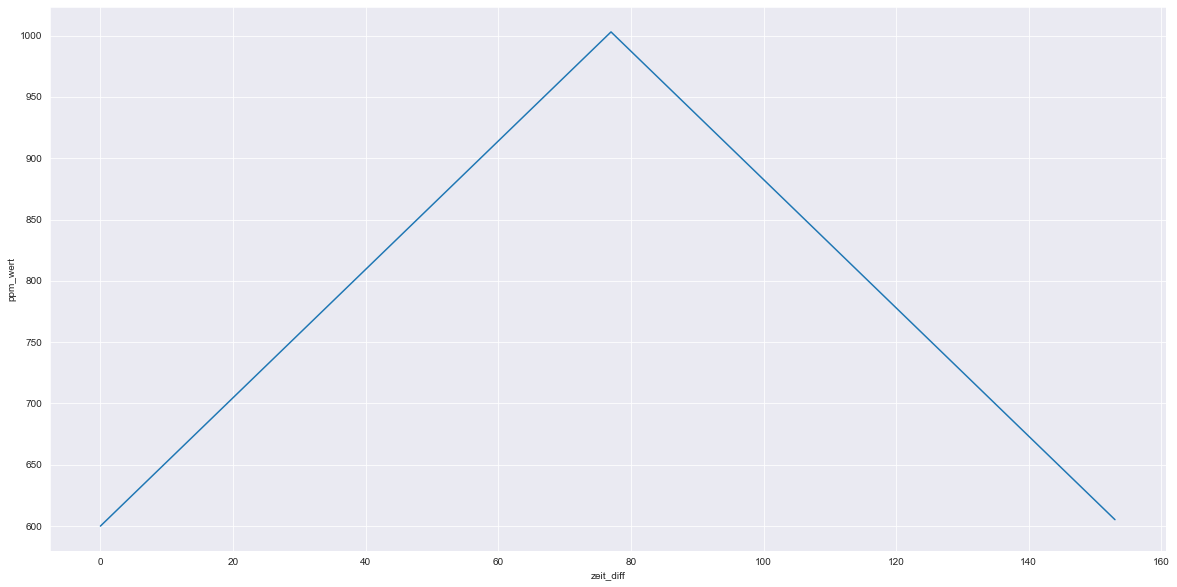

In [610]:
#plot ppm_wert vs zeit_diff
plt.figure(figsize=(20,10))
sns.lineplot(x="zeit_diff", y="ppm_wert", data=df_lueften_daten)